# ML Bootcamp: Support Vector Machines

In this lab, we will provide an interactive demonstration of support vector machines, predicting what number is represented by handwritten images of digits 0-9. 

Let's first start by loading the data in. We will use the scikit-learn digits dataset as a reference. Each piece of data consists of a representation of a handwritten digit and a label corresponding to the number of the drawn digit.

In [0]:
import numpy as np
from sklearn import datasets


digits = datasets.load_digits()
digits_X = digits.data
digits_y = digits.target

We can visualize some of the examples in our dataset.

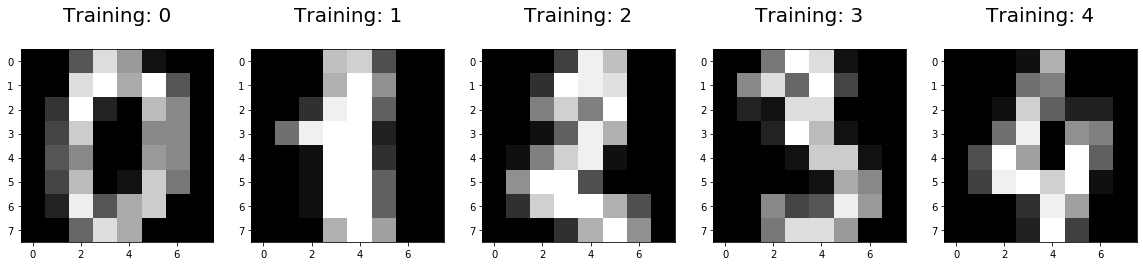

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

As we usually do in machine learning, let's separate our data into a subset to **train** on and a subset to **test** on. 

In [0]:
np.random.seed(0)
indices = np.random.permutation(len(digits_X))

# |with_ex| is the number of test examples
# Precondition: with_ex < 0
with_ex = -50

digits_X_train = digits_X[indices[:with_ex]]
digits_y_train = digits_y[indices[:with_ex]]


digits_X_test = digits_X[indices[with_ex:]]
digits_y_test = digits_y[indices[with_ex:]]
images_X_test = digits.images[indices[with_ex:]]

Now, we will use scikit-learn's implementation of SVM. We will train our model on the training subset, and then use that model to make predictions for our test set.

In [0]:
from sklearn import svm

model = svm.SVC(kernel='linear')

Now, we can train the classifier on the training subset.

In [0]:
model.fit(digits_X_train, digits_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

With the trained models, we can make predictions on the testing subset. 

In [0]:
preds = model.predict(digits_X_test)

Let's now visualize our predictions!

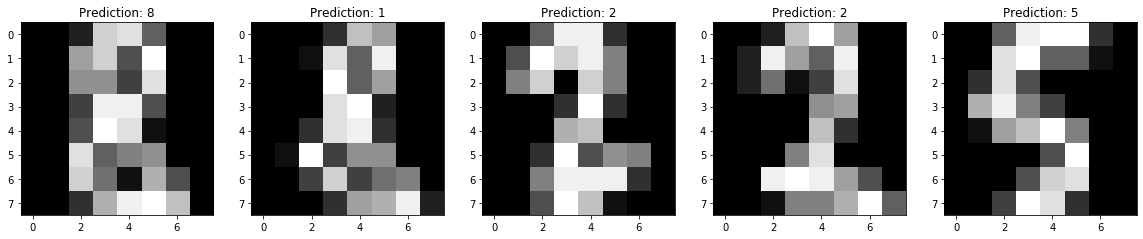

In [0]:
# Plot outputs
images_and_predictions = list(zip(images_X_test, preds))
plt.figure(figsize=(20,4))
for index, (image, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(1, 5, index + 1)
#     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Prediction: %i' % prediction)

plt.show()

Finally, we can compute our classification accuracy, or the percentage of examples in the test subset classified correctly. The following code snippet computes the accuracy.

In [0]:
# Compute number of examples classified correctly

num_correct = 0
for i in range(len(preds)):
  if preds[i] == digits_y_test[i]:
    num_correct += 1
    
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))

The fraction of correctly classified examples in the test set is: 0.96


We can visualize the classification of examples in the test set with a confusion matrix. Scikit learn contains code to do this for us! Note that elements in the LR diagonal are the number of correctly classified examples. Nonzero elements that aren't in the LR diagonal tell us that there were some elements that weren't classified correctly.

In [0]:
from sklearn import metrics

print("Confusion matrix:\n%s" % metrics.confusion_matrix(digits_y_test, preds))

Confusion matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0]
 [0 1 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 1 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 3]]
